In [154]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [155]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [156]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
for column in df.columns:
    df[column] = lab.fit_transform(df[column])

df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


<AxesSubplot:>

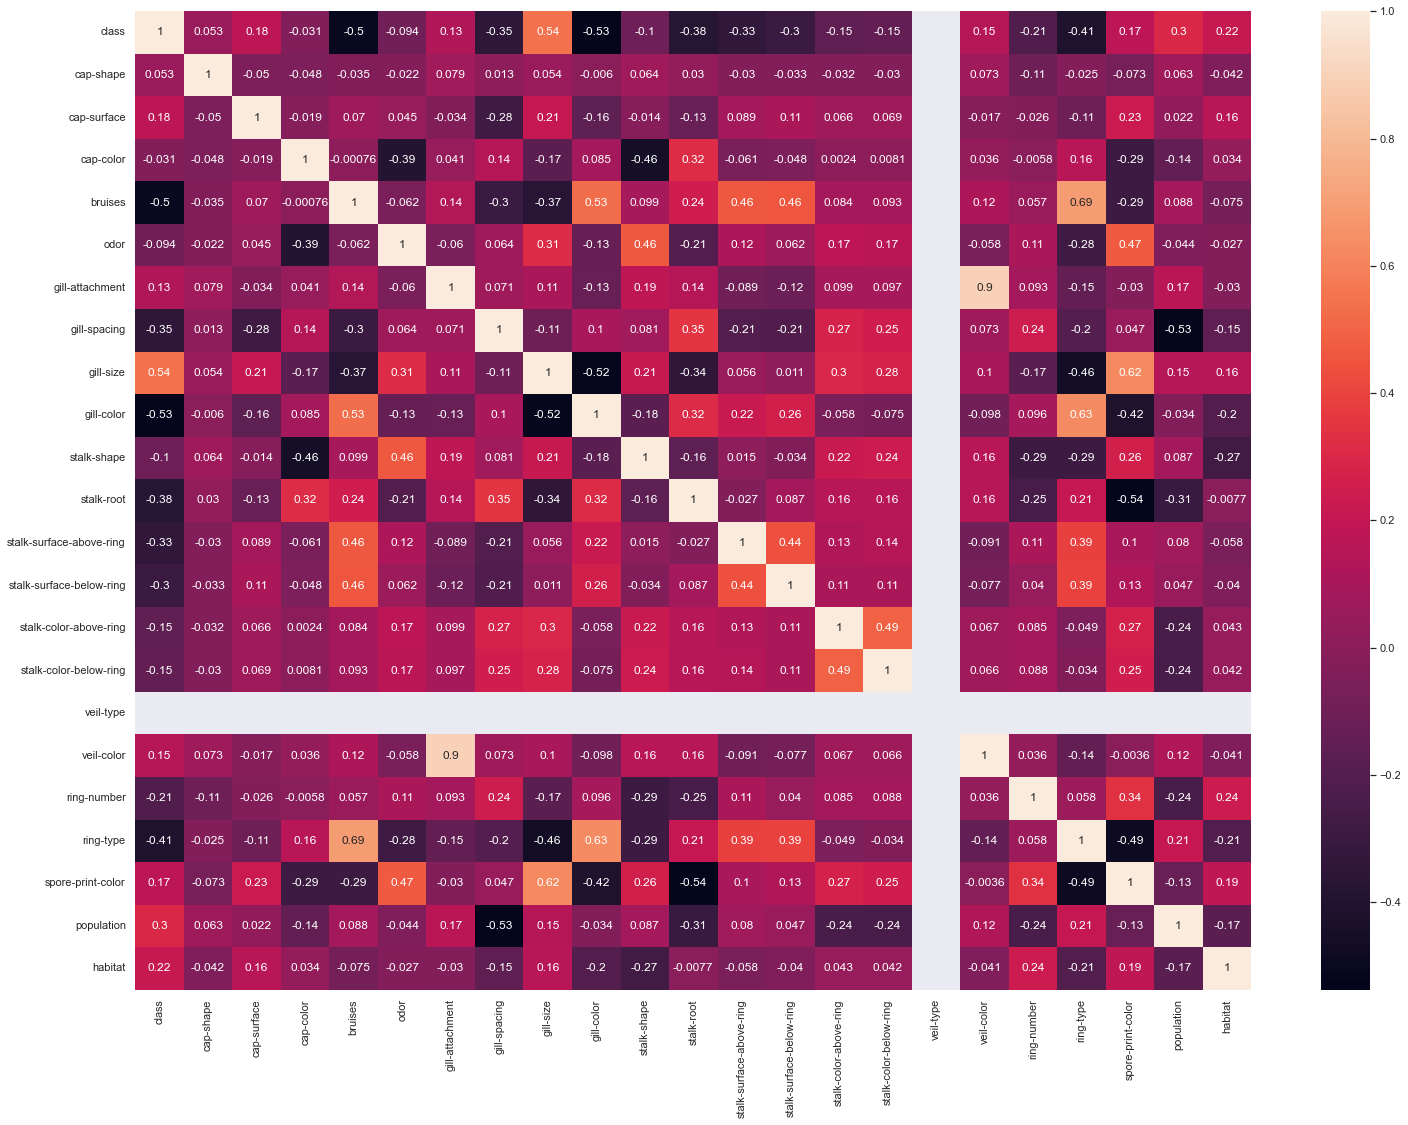

In [157]:
corr_matrix = df.corr()
sns.set(rc = {'figure.figsize':(25,18)})
sns.heatmap(corr_matrix, annot=True)

In [158]:
from sklearn.model_selection import train_test_split

# класс для kNN классификатора
from sklearn.neighbors import KNeighborsClassifier 

# метод для кросс-валидации данных
from sklearn.model_selection import cross_val_score 

# алгоритм разбиения выборки на группы(фолды)
from sklearn.model_selection import KFold 

# алгоритм разбиения выборки на стратифицированные группы(фолды)
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

In [159]:
X = df[['gill-size', 'population', 'habitat', 'cap-surface', 'spore-print-color']]
y = df.iloc[:, 0].values


In [160]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score # метод для кросс-валидации данных

from sklearn.model_selection import KFold # алгоритм разбиения выборки на группы(фолды)
from sklearn.model_selection import StratifiedKFold

In [161]:
# Зафиксируем случайность, чтобы каждый раз получалось одно и тоже
np.random.seed(seed=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

# у оценщиков есть score метод, обеспечивающий критерий оценки по умолчанию для проблемы, для решения которой они предназначены
print(clf.score(X_test,y_test))

0.9913846153846154


In [162]:
'''X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

# у оценщиков есть score метод, обеспечивающий критерий оценки по умолчанию для проблемы, для решения которой они предназначены
print(clf.score(X_test,y_test))'''
#0.9897456931911403

'X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)\n\nclf = KNeighborsClassifier()\nclf.fit(X_train, y_train)\n\n# у оценщиков есть score метод, обеспечивающий критерий оценки по умолчанию для проблемы, для решения которой они предназначены\nprint(clf.score(X_test,y_test))'

In [174]:
num = 9
print('истинное значение:', y_test[num]) # истинное значение
print('предсказанное значение:', clf.predict(X_test)[num]) # предсказанное значение

истинное значение: 0
предсказанное значение: 0


In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

clf = KNeighborsClassifier()

#кросс-валидация
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

%time scores = cross_val_score(clf, X, y, cv=cv)

print("Accuracy:", scores.mean())

Wall time: 849 ms
Accuracy: 0.9911373247442213


In [165]:
# разобъем датасет на train и test в пропорции 60/40
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)
y_test = y_test.astype('int')

clf = KNeighborsClassifier()
clf.fit(X_train, y_train) # обучим модель

# предскажем тэги на тестовой подвыборке
y_pred = clf.predict(X_test).astype('int') 

print(classification_report(y_test, y_pred)) # напечатаем отчет о классификации

# accurancy - представляет собой соотношение кол-ва корректных предсказаний и общего кол-ва меток
# precision = TP / (TP + TN)
# recall = TP / (TP + FN) <-- все позитивные
# f1-score = (2 * PR * RC) / (PR + RC)
# support - количество фактических вхождений класса в указанный набор данных.


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1678
           1       0.99      0.99      0.99      1572

    accuracy                           0.99      3250
   macro avg       0.99      0.99      0.99      3250
weighted avg       0.99      0.99      0.99      3250



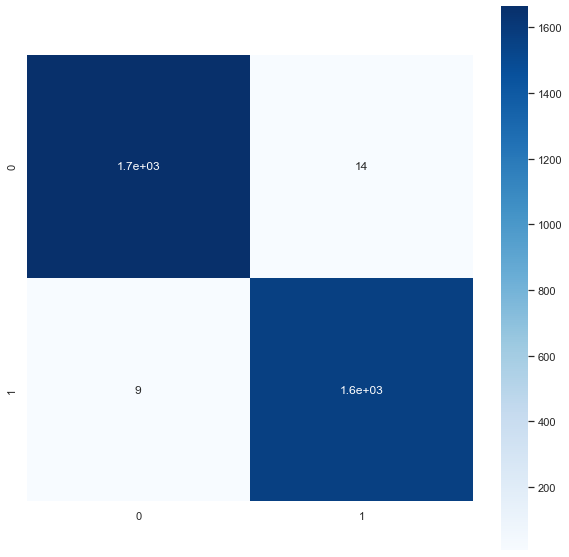

In [166]:
# Построим confusion матрицу, для того, чтобы посмотреть какие классы путает алгоритм. При идеальном предсказании матрица должна быть диагональной.

plt.figure(figsize=(10,10)) 
_ = sns.heatmap(confusion_matrix(y_test, y_pred), 
                cmap=plt.cm.Blues, square=True, 
                annot=True)

Подбор гиперпараметров

!!!!Best K = 1
!!!!Best cross_val_score = 0.9753788556271316


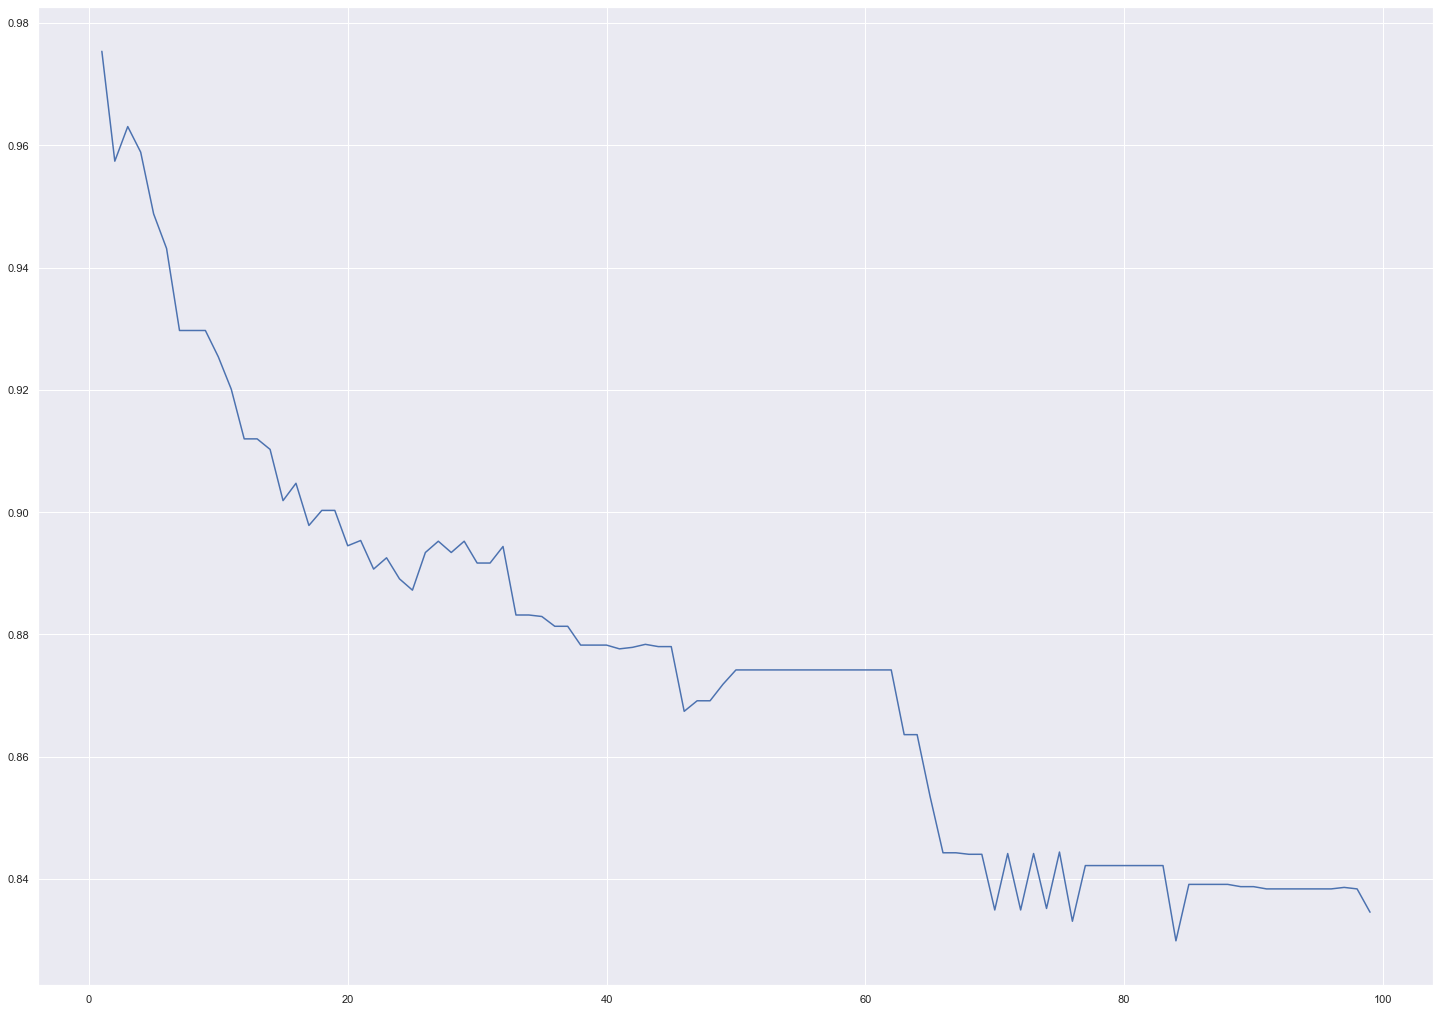

In [167]:
# Переберем в лоб количество соседей k
from sklearn.preprocessing import scale

X_scaled = scale(X)                   # включим масштабирование
cv = KFold(n_splits=5, shuffle=False) # фиксируем разбиения! Выключаем перемешивание для повтора результатов

k_vals = np.arange(1, 100, 1)
quality_by_k = [
    cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=cv).mean() for k in k_vals
]

print("!!!!Best K =",k_vals[np.argmax(quality_by_k)])
print("!!!!Best cross_val_score =",np.max(quality_by_k))
plt.plot(k_vals, quality_by_k) 

1.0


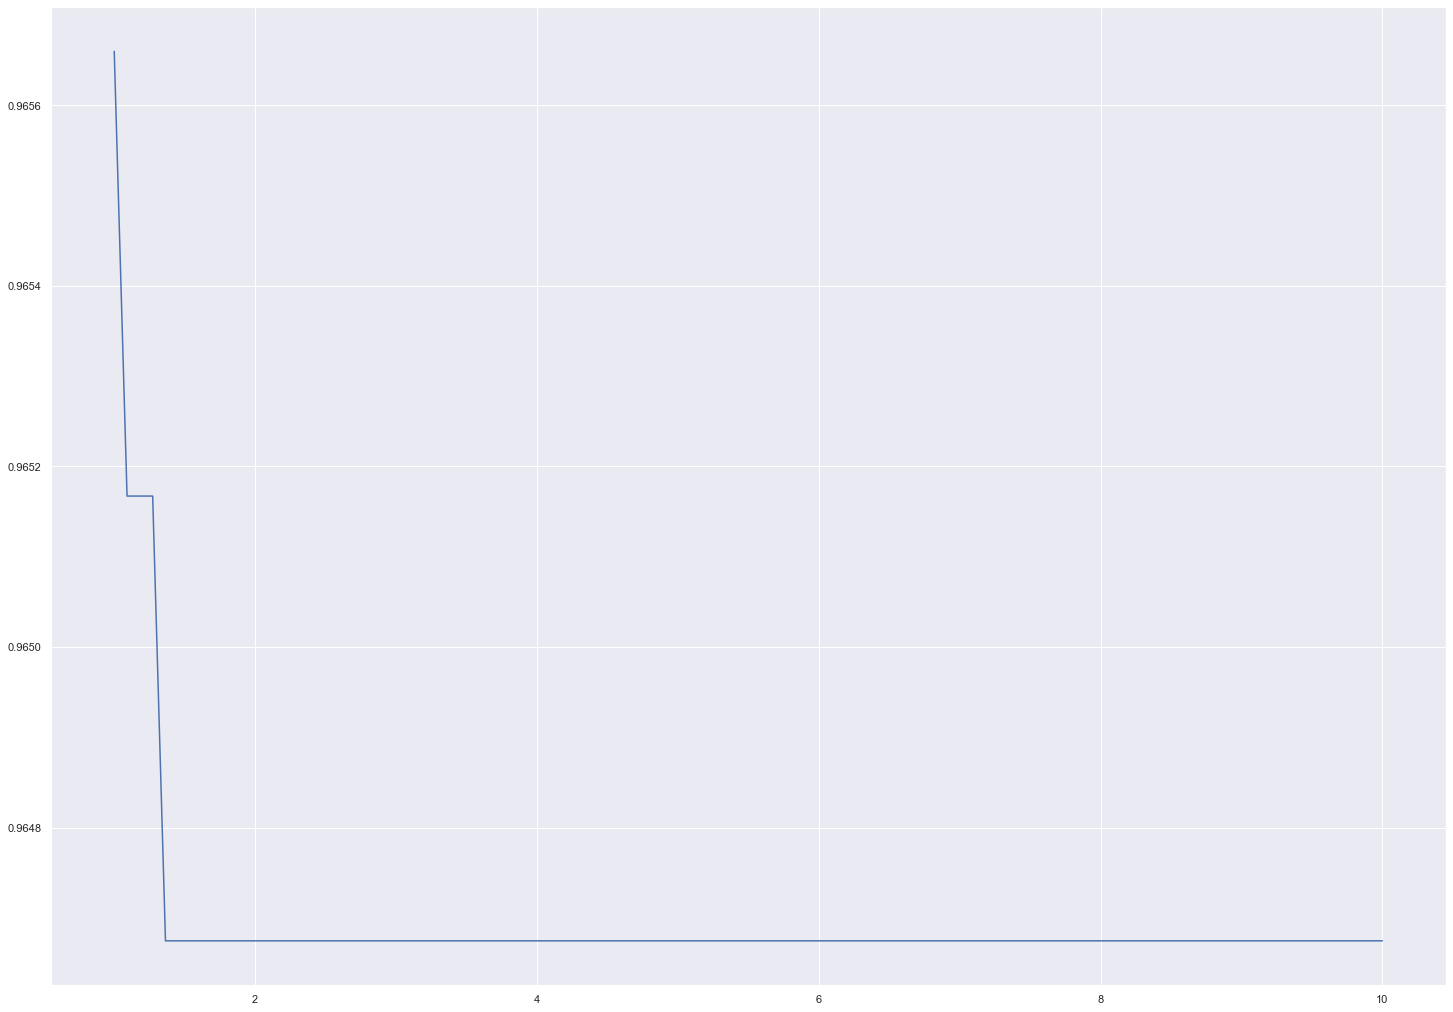

In [172]:
cv = KFold(n_splits=5, shuffle=False)

p_vals = np.linspace(1, 10, 100)
quality_by_p = [
    cross_val_score(KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=p), X_scaled, y, cv=cv).mean()
    for p in p_vals
]

print(p_vals[np.argmax(quality_by_p)])
plt.plot(p_vals, quality_by_p)

In [168]:
# Попробуем подобрать гиперпараметры средствами sklearn.model_selection (GridSearchCV)

# задаем набор параметров
params = {
    "n_neighbors": np.arange(1,21,1), 
    "p": np.arange(1, 6)
}

# создади модель GridSearchCV
# и обучим эту модель
# напомним, что было выше  cv = KFold(n_splits=5, shuffle=False)

search = GridSearchCV(KNeighborsClassifier(), params, n_jobs=2, 
                      cv=cv, verbose=2)
search.fit(X_scaled, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'p': array([1, 2, 3, 4, 5])},
             verbose=2)

BEST: score=0.9660242516104585, params={'n_neighbors': 3, 'p': 1}


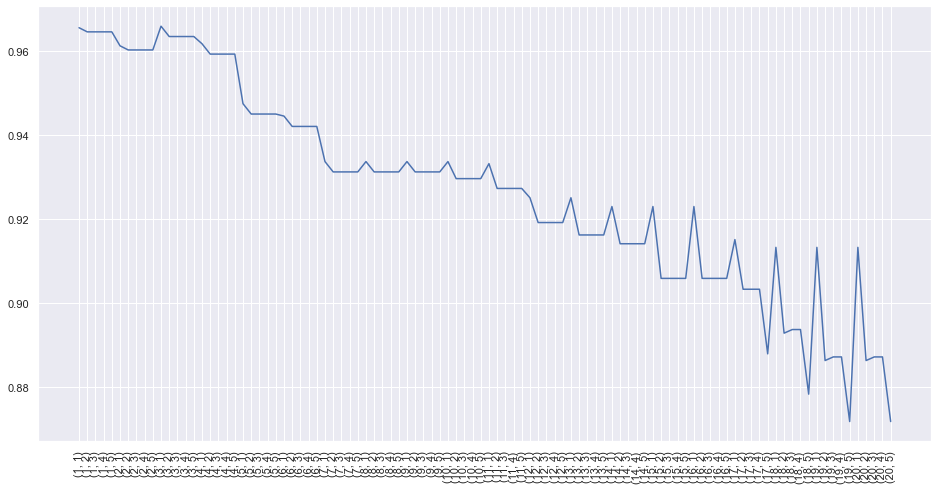

In [169]:
x_ticks = ["({}, {})".format( p['n_neighbors'], p['p']) for i,p in enumerate(search.cv_results_['params'])]

plt.figure(figsize=(16,8))
plt.plot(x_ticks, search.cv_results_['mean_test_score'])
_ =plt.xticks(rotation=90)

print("BEST: score={}, params={}".format(search.best_score_, search.best_params_))

In [173]:
'''При подборе гиперпараметров получаем, что наилучший результат

score=0.9660242516104585

достигается в методе k-ближайших соседей при параметрах

params={'n_neighbors': 3, 'p': 1} - манхэттенская метрика и 3-ближайших соседей'''

"При подборе гиперпараметров получаем, что наилучший результат\n\nscore=0.9660242516104585\n\nдостигается в методе k-ближайших соседей при параметрах\n\nparams={'n_neighbors': 3, 'p': 1} - манхэттенская метрика и 3-ближайших соседей"